<a href="https://colab.research.google.com/github/jmotawakel/Neuromorpho/blob/main/netpyne_osc_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to install NEURON and NetPyNE (output hidden)

%%capture
!pip install neuron
!pip install netpyne
import matplotlib
from netpyne import specs, sim


Start time:  2021-11-09 03:55:13.834785

Creating network of 5 cell populations on 1 hosts...
  Number of cells on node 0: 81 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 867 
  Done; cell connection time = 0.10 s.
Adding stims...
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 4 traces of 1 types on node 0

Running simulation for 200.0 ms...
  Done; run time = 0.52 s; real-time ratio: 0.39.

Gathering data...
  Done; gather time = 0.05 s.

Analyzing...
  Cells: 81
  Connections: 867 (10.70 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 0.2 s; 1 workers
  Run time: 0.52 s
  Done; saving time = 0.05 s.
Plotting recorded cell traces ... cell


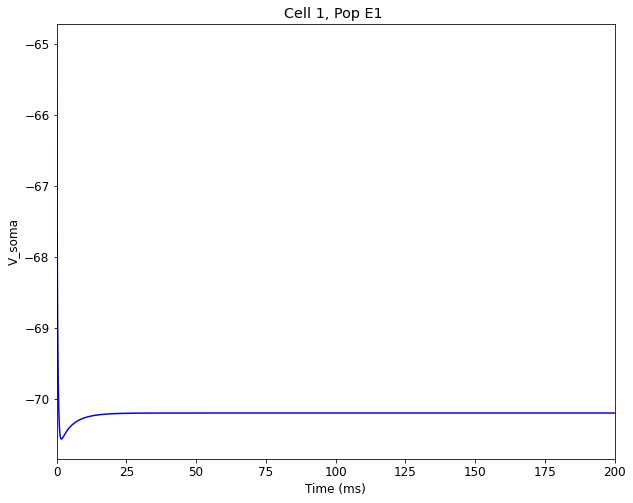

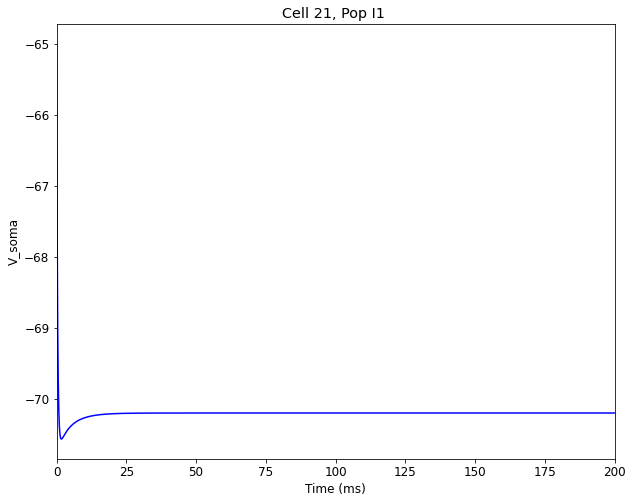

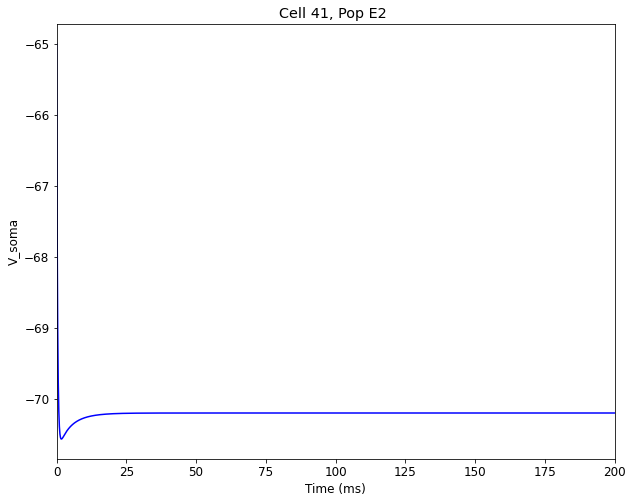

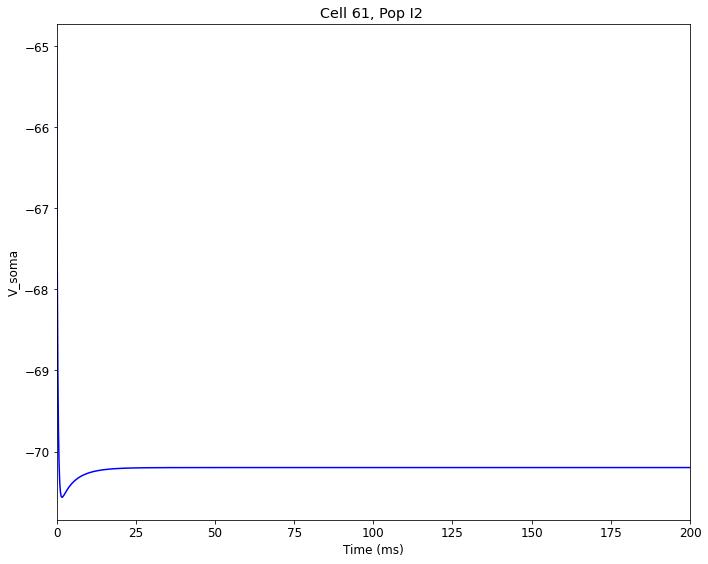

Plotting raster...
No spikes available to plot raster
Plotting spike histogram...


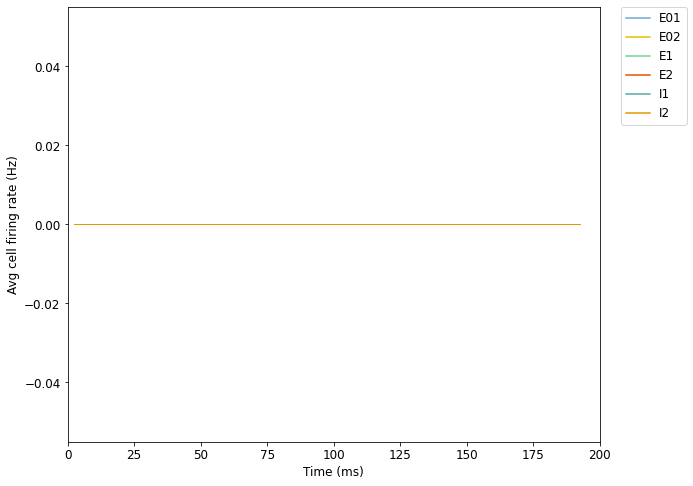

Plotting firing rate spectrogram ...


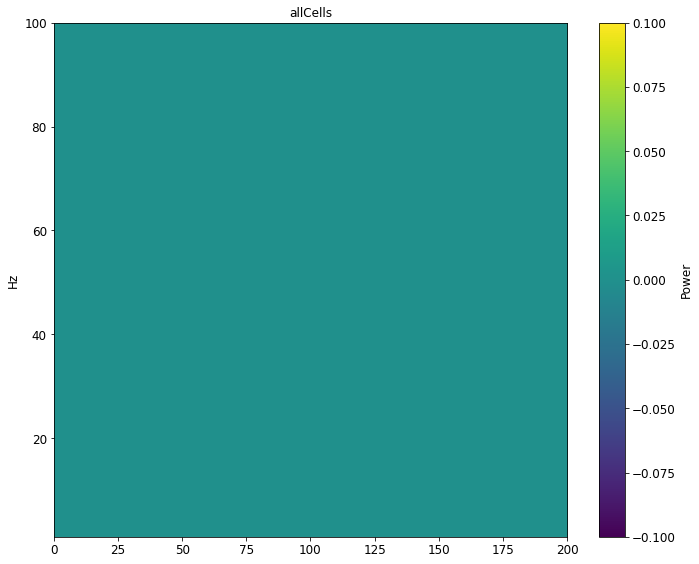

  Done; plotting time = 1.62 s

Total time = 2.35 s

End time:  2021-11-09 03:55:16.188147


In [ ]:
%matplotlib inline
from netpyne import specs, sim

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters


## Cell Parameters
secs = {}  # cell rule dict
secs['soma'] = {'geom': {}, 'mechs': {}}
secs['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}
secs['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}
netParams.cellParams['PYR'] = {'secs': secs}

## Population parameters
netParams.popParams['E1'] = {'cellType': 'PYR', 'numCells': 20}
netParams.popParams['I1'] = {'cellType': 'PYR', 'numCells': 20}
netParams.popParams['E2'] = {'cellType': 'PYR', 'numCells': 20}
netParams.popParams['I2'] = {'cellType': 'PYR', 'numCells': 20}
netParams.popParams['E0'] = {'cellType': 'PYR', 'numCells': 1}


## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0}  # excitatory synaptic mechanism
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 6.0, 'e': -70}  # inhibitory synaptic mechanism


# Stimulation parameters
netParams.stimSourceParams['bkg1'] = {'type': 'NetStim', 'rate': 10, 'noise': .5}
netParams.stimSourceParams['bkg2'] = {'type': 'NetStim', 'rate': 10, 'noise': .5}

netParams.stimTargetParams['bkg->PYR'] = {'source': 'bkg1',
                                          'conds': {'pop': 'E01'},
                                          'weight': 0.01,
                                          'delay': 5,
                                          'synMech': 'exc'}

netParams.stimTargetParams['bkg->PYR'] = {'source': 'bkg2',
                                          'conds': {'pop': 'E02'},
                                          'weight': 0.01,
                                          'delay': 5,
                                          'synMech': 'exc'}

## Cell connectivity rules
netParams.connParams['E01->E1'] = {        #  E -> I label
        'preConds': {'pop': 'E01'},       # conditions of presyn cells
        'postConds': {'pop': 'E1'},      # conditions of postsyn cells
        'divergence': 5,                # divergence
        'weight': 0.01,                 # synaptic weight
        'delay': 5,                     # transmission delay (ms)
        'synMech': 'exc'}               # synaptic mechanism

netParams.connParams['E02->E2'] = {        #  E -> I label
        'preConds': {'pop': 'E02'},       # conditions of presyn cells
        'postConds': {'pop': 'E2'},      # conditions of postsyn cells
        'divergence': 5,                # divergence
        'weight': 0.01,                 # synaptic weight
        'delay': 5,                     # transmission delay (ms)
        'synMech': 'exc'}               # synaptic mechanism

netParams.connParams['E1->I1'] = {        #  E -> I label
        'preConds': {'pop': 'E1'},       # conditions of presyn cells
        'postConds': {'pop': 'I1'},      # conditions of postsyn cells
        'divergence': 1,                # divergence
        'weight': 0.01,                 # synaptic weight
        'delay': 5,                     # transmission delay (ms)
        'synMech': 'exc'}               # synaptic mechanism

                
netParams.connParams['I1->E2'] = {        #  I -> E label
        'preConds': {'pop': 'I1'},       # conditions of presyn cells
        'postConds': {'pop': 'E2'},      # conditions of postsyn cells
        'probability': 0.7,             # probability
        'weight': 0.09,                 # synaptic weight
        'delay': 5,                     # transmission delay (ms)
        'synMech': 'inh'}               # synaptic mechanism

netParams.connParams['E2->I2'] = {        #  E -> I label
        'preConds': {'pop': 'E2'},       # conditions of presyn cells
        'postConds': {'pop': 'I2'},      # conditions of postsyn cells
        'divergence': 1,                # divergence
        'weight': 0.01,                 # synaptic weight
        'delay': 5,                     # transmission delay (ms)
        'synMech': 'exc'}               # synaptic mechanism

netParams.connParams['I2->E1'] = {        #  I -> E label
        'preConds': {'pop': 'I2'},       # conditions of presyn cells
        'postConds': {'pop': 'E1'},      # conditions of postsyn cells
        'probability': 0.7,             # probability
        'weight': 0.09,                 # synaptic weight
        'delay': 5,                     # transmission delay (ms)
        'synMech': 'inh'}               # synaptic mechanism

netParams.connParams['E1->E2'] = {        #  I -> E label
        'preConds': {'pop': 'E1'},       # conditions of presyn cells
        'postConds': {'pop': 'E2'},      # conditions of postsyn cells
        'probability': 0.7,             # probability
        'weight': 0.01,                 # synaptic weight
        'delay': 5,                     # transmission delay (ms)
        'synMech': 'exc'}               # synaptic mechanism


# Simulation options
simConfig = specs.SimConfig()           # object of class SimConfig to store simulation configuration

simConfig.duration = 200                     # Duration of the simulation, in ms
simConfig.dt = 0.025                            # Internal integration timestep to use
simConfig.verbose = False                       # Show detailed messages
simConfig.recordTraces = {'V_soma': {'sec':'soma','loc':0.5, 'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1                      # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'model_output'             # Set file output name
simConfig.savePickle = False                    # Save params, network and sim output to pickle file

simConfig.analysis['plotTraces'] = {'include': [1, 21, 41, 61, 81]}                           # Plot recorded traces for this list of cells
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'syncLines': True}  # Plot a raster
simConfig.analysis['plotSpikeHist'] = {'include': ['E01','E02','E1', 'E2', 'I1', 'I2']}                 # Plot spike histogram
simConfig.analysis['plotRateSpectrogram'] = {'include': ['allCells']}         # Plot binned spiking rate spectrogram    
#simConfig.analysis['plotLFP'] = {'plots': ['timeSeries', 'PSD', 'spectrogram']}         # Plot binned spiking rate spectrogram    


#simConfig.recordLFP = [[50,50,50]]

# create, simualte and analyze model
sim.createSimulateAnalyze(netParams, simConfig)


# Play around with model and see how parameters affect oscillations, e.g.:
# - set I->E connection probability to 0.0 (set back to 0.7 afterwards)
# - increase I->E connection delay to 20 ms (set back to 5 ms afterwards) 
# - increase 'inh' synapse tau2 time constatn to 20 ms (set back to 5 ms afterwards)
